In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
# sys.path.insert(0,'../../../..')
# from omama import gp2
# from omama.gp2 import Runner
import gp2
from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

In [3]:
R = Runner(classifier='kattunet2d',
           filter_num=[16, 32, 64, 128, 256, 512],
           stack_num_down=2,
           stack_num_up=2,
           activation='ReLU',
           atten_activation='ReLU',
           attention='add',
           output_activation='Sigmoid',
           batch_norm=True,
           pool=True,
           unpool=False,
           weights='imagenet',
           optimizer= None, #None = default is optimizers.Adam(learning_rate=1e-3)
           loss=None, #None = default is losses.binary_crossentropy
           metric=None # None = default is Util.dice_coef
          )

*** GP2 KATTUNet2D ***
Working directory: /tmp/tmpmew_rewdGP2


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/EBHI-SEG/EBHI_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/EBHI-SEG/EBHI_masks.npy')

In [5]:
images.shape

(2180, 512, 512, 1)

In [6]:
masks.shape

(2180, 512, 512, 1)

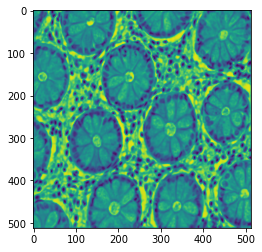

In [7]:
imshow(images[15])

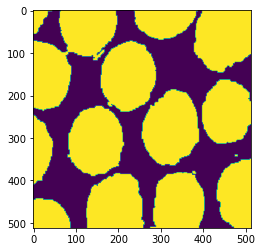

In [8]:
imshow(masks[15])

In [9]:
R.run(images=images, masks=masks, runs=8, use_multi_gpu=True)

Number of devices: 2
Weights OK!
******
Loop 1
Epoch 1/100
2/2 [==============================] - 23s 10s/step - loss: 0.7397 - dice_coeff: 0.5789 - val_loss: 0.6928 - val_dice_coeff: 0.5797
Epoch 2/100
2/2 [==============================] - 2s 1s/step - loss: 0.7208 - dice_coeff: 0.5842 - val_loss: 0.6921 - val_dice_coeff: 0.5800
Epoch 3/100
2/2 [==============================] - 2s 1s/step - loss: 0.7047 - dice_coeff: 0.5877 - val_loss: 0.6911 - val_dice_coeff: 0.5806
Epoch 4/100
2/2 [==============================] - 2s 1s/step - loss: 0.6928 - dice_coeff: 0.5940 - val_loss: 0.6901 - val_dice_coeff: 0.5814
Epoch 5/100
2/2 [==============================] - 2s 1s/step - loss: 0.6805 - dice_coeff: 0.5971 - val_loss: 0.6893 - val_dice_coeff: 0.5821
Epoch 6/100
2/2 [==============================] - 2s 1s/step - loss: 0.6683 - dice_coeff: 0.6049 - val_loss: 0.6885 - val_dice_coeff: 0.5829
Epoch 7/100
2/2 [==============================] - 2s 1s/step - loss: 0.6563 - dice_coeff: 0.6114 -

2/2 [==============================] - 2s 2s/step - loss: 0.2270 - dice_coeff: 0.8476 - val_loss: 0.7074 - val_dice_coeff: 0.5632
Epoch 59/100
2/2 [==============================] - 2s 1s/step - loss: 0.2230 - dice_coeff: 0.8493 - val_loss: 0.7157 - val_dice_coeff: 0.5563
Epoch 60/100
2/2 [==============================] - 2s 1s/step - loss: 0.2215 - dice_coeff: 0.8505 - val_loss: 0.7222 - val_dice_coeff: 0.5511
Epoch 61/100
2/2 [==============================] - 2s 1s/step - loss: 0.2191 - dice_coeff: 0.8520 - val_loss: 0.7290 - val_dice_coeff: 0.5457
Epoch 62/100
2/2 [==============================] - 2s 1s/step - loss: 0.2168 - dice_coeff: 0.8533 - val_loss: 0.7376 - val_dice_coeff: 0.5392
Epoch 63/100
2/2 [==============================] - 2s 1s/step - loss: 0.2156 - dice_coeff: 0.8541 - val_loss: 0.7452 - val_dice_coeff: 0.5334
Epoch 64/100
2/2 [==============================] - 2s 1s/step - loss: 0.2137 - dice_coeff: 0.8550 - val_loss: 0.7497 - val_dice_coeff: 0.5300
Epoch 65/100

3/3 [==============================] - 3s 929ms/step - loss: 0.1875 - dice_coeff: 0.8765 - val_loss: 0.6711 - val_dice_coeff: 0.6363
Epoch 13/100
3/3 [==============================] - 3s 938ms/step - loss: 0.1857 - dice_coeff: 0.8778 - val_loss: 0.6152 - val_dice_coeff: 0.6899
Epoch 14/100
3/3 [==============================] - 3s 976ms/step - loss: 0.1820 - dice_coeff: 0.8792 - val_loss: 1.3892 - val_dice_coeff: 0.2376
Epoch 15/100
3/3 [==============================] - 3s 929ms/step - loss: 0.1809 - dice_coeff: 0.8790 - val_loss: 1.1694 - val_dice_coeff: 0.3343
Epoch 16/100
3/3 [==============================] - 3s 947ms/step - loss: 0.1754 - dice_coeff: 0.8820 - val_loss: 0.7859 - val_dice_coeff: 0.5611
Epoch 17/100
3/3 [==============================] - 3s 941ms/step - loss: 0.1769 - dice_coeff: 0.8811 - val_loss: 0.8876 - val_dice_coeff: 0.5016
Epoch 18/100
3/3 [==============================] - 3s 957ms/step - loss: 0.1720 - dice_coeff: 0.8837 - val_loss: 0.9788 - val_dice_coeff

In [10]:
R.classifier_scores

[[1.0709565877914429, 0.3503066599369049],
 [1.1672158241271973, 0.31012845039367676],
 [1.1453986167907715, 0.38572901487350464],
 [0.6971635818481445, 0.6873408555984497]]

In [11]:
R.discriminator_scores

[[0.0, 1.0],
 [0.0, 1.0],
 [58.828765869140625, 0.4307692348957062],
 [151.9549102783203, 0.4692307710647583]]

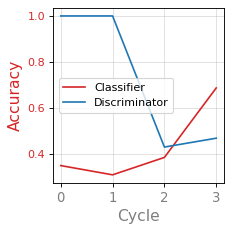

In [12]:
R.plot()